# 1. K-prototype

- 범주형과 수치형 변수가 혼합된 데이터 군집화 방법

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/train.csv/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df_drop_id = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df_drop_id_duplicated = df_drop_id.drop_duplicates()

df_drop_id_duplicated.reset_index(drop=True, inplace=True)
df_drop_id_duplicated

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
164906,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
164907,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
164908,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
164909,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


- 최적의 k 찾기

In [20]:
from tqdm import tqdm

100%|██████████| 4/4 [2:50:15<00:00, 2553.96s/it]


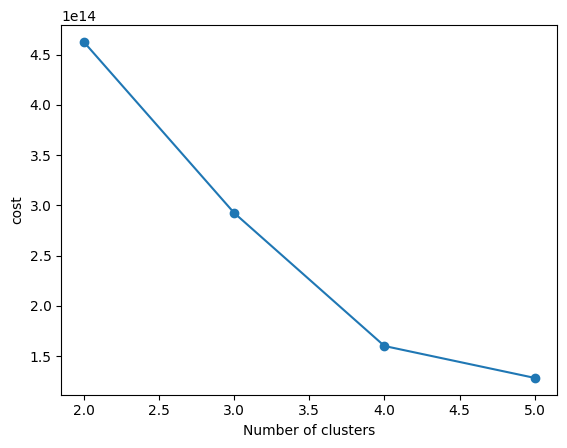

In [26]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
costs = []
n_clusters = []

for k in tqdm(range(2, 6)):
  kprototypes = KPrototypes(n_clusters=k, random_state=13)
  k_model = kprototypes.fit(df_drop_id_duplicated.iloc[:, :-1], categorical=[1, 2, 7, 8])
  costs.append(k_model.cost_)


# cost 그래프 그리기
plt.plot(range(2, 6), costs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show()

- k == 4

In [27]:
%%time

kproto_clusters = KPrototypes(n_clusters=4, random_state=13)
result_cluster = kproto_clusters.fit_predict(df_drop_id_duplicated.iloc[:, :-1], categorical=[1, 2, 7, 8])

CPU times: user 42min 3s, sys: 53.1 s, total: 42min 56s
Wall time: 42min 46s


- 군집 간 개체 수 확인

In [28]:
df_drop_id_duplicated['Clusters'] = result_cluster
df_drop_id_duplicated['Clusters'].value_counts()

0    49253
3    41057
2    40828
1    33773
Name: Clusters, dtype: int64

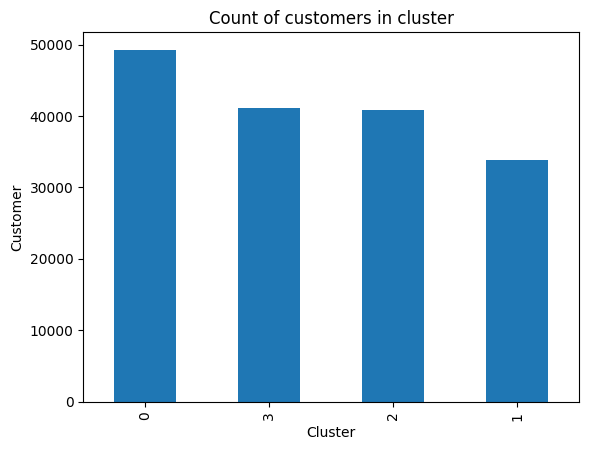

In [30]:
df_drop_id_duplicated['Clusters'].value_counts().plot(kind='bar', title='Count of customers in cluster', xlabel='Cluster', ylabel='Customer');

In [31]:
kproto_clusters.cluster_centroids_

array([['655.6108460398351', '37.563667999918785', '5.05394595253081',
        '410.2766174646804', '1.7356303169350091', '151439.31577609593',
        'France', 'Male', '1.0', '1.0'],
       ['657.4312024398188', '38.89171823646108', '4.983093003286649',
        '121935.28652503739', '1.3346756284606047', '66169.75879020836',
        'Germany', 'Male', '1.0', '0.0'],
       ['656.9254923091995', '38.65566376016459', '4.996105613794454',
        '122306.08959733925', '1.328671499951014', '151838.96205618654',
        'Germany', 'Male', '1.0', '0.0'],
       ['656.2526731129892', '37.63708989940814', '5.035803882407385',
        '428.8987047275725', '1.742285115814599', '65099.10872465234',
        'France', 'Male', '1.0', '1.0']], dtype='<U32')

- 군집 간 이탈률 확인

In [33]:
df_drop_id_duplicated.groupby(['Clusters'])['Exited'].mean().sort_values(ascending=False)

Clusters
2    0.278387
1    0.261659
0    0.168497
3    0.156051
Name: Exited, dtype: float64

- 군집 간 신용점수 분포 및 평균 확인

In [58]:
df_0 = df_drop_id_duplicated[df_drop_id_duplicated['Clusters'] == 0]
df_1 = df_drop_id_duplicated[df_drop_id_duplicated['Clusters'] == 1]
df_2 = df_drop_id_duplicated[df_drop_id_duplicated['Clusters'] == 2]
df_3 = df_drop_id_duplicated[df_drop_id_duplicated['Clusters'] == 3]

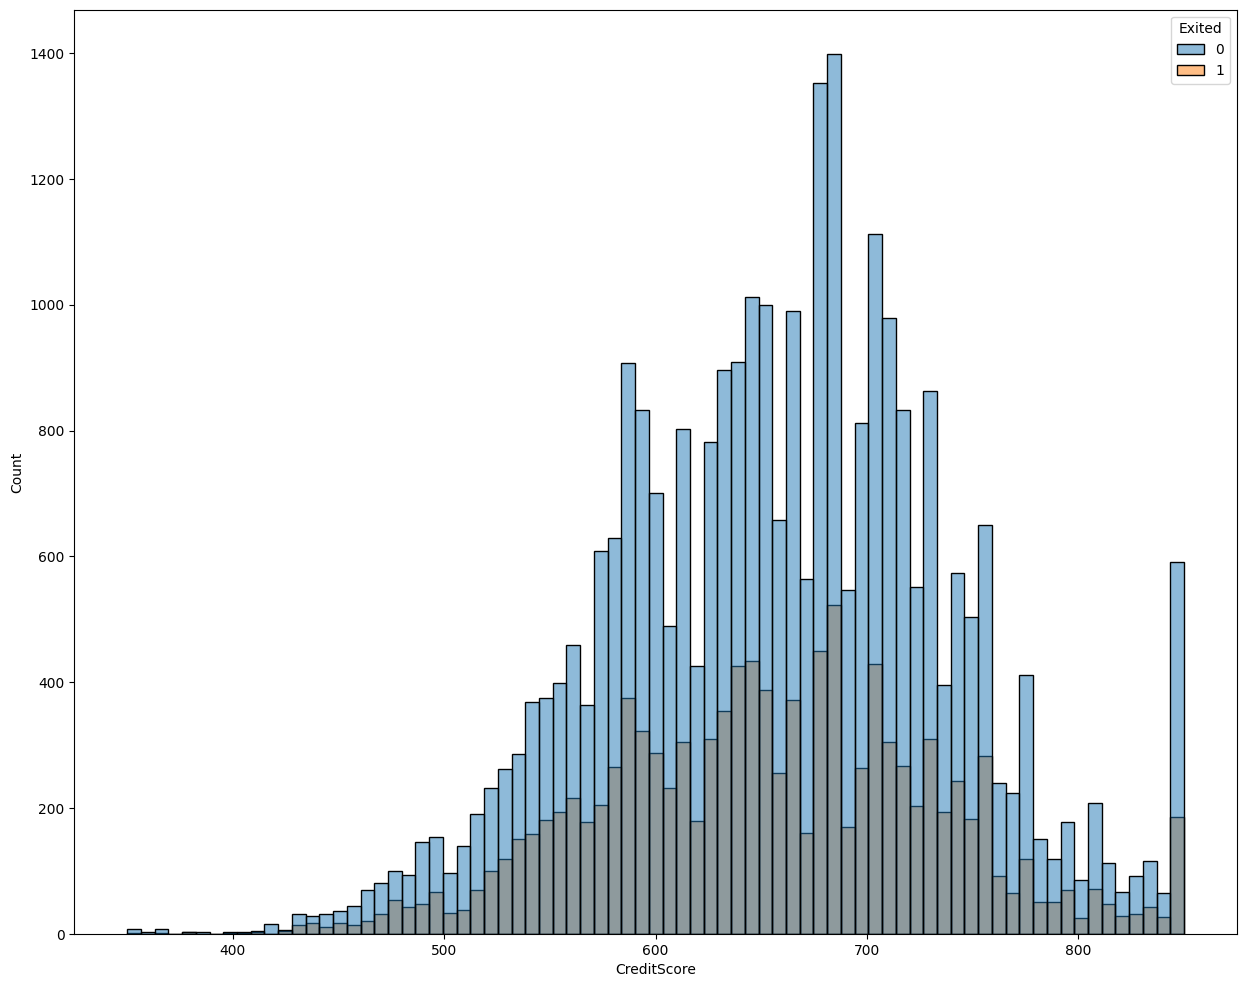

In [77]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_2['CreditScore'], hue = df_2['Exited'], palette = sns.color_palette())
plt.show();

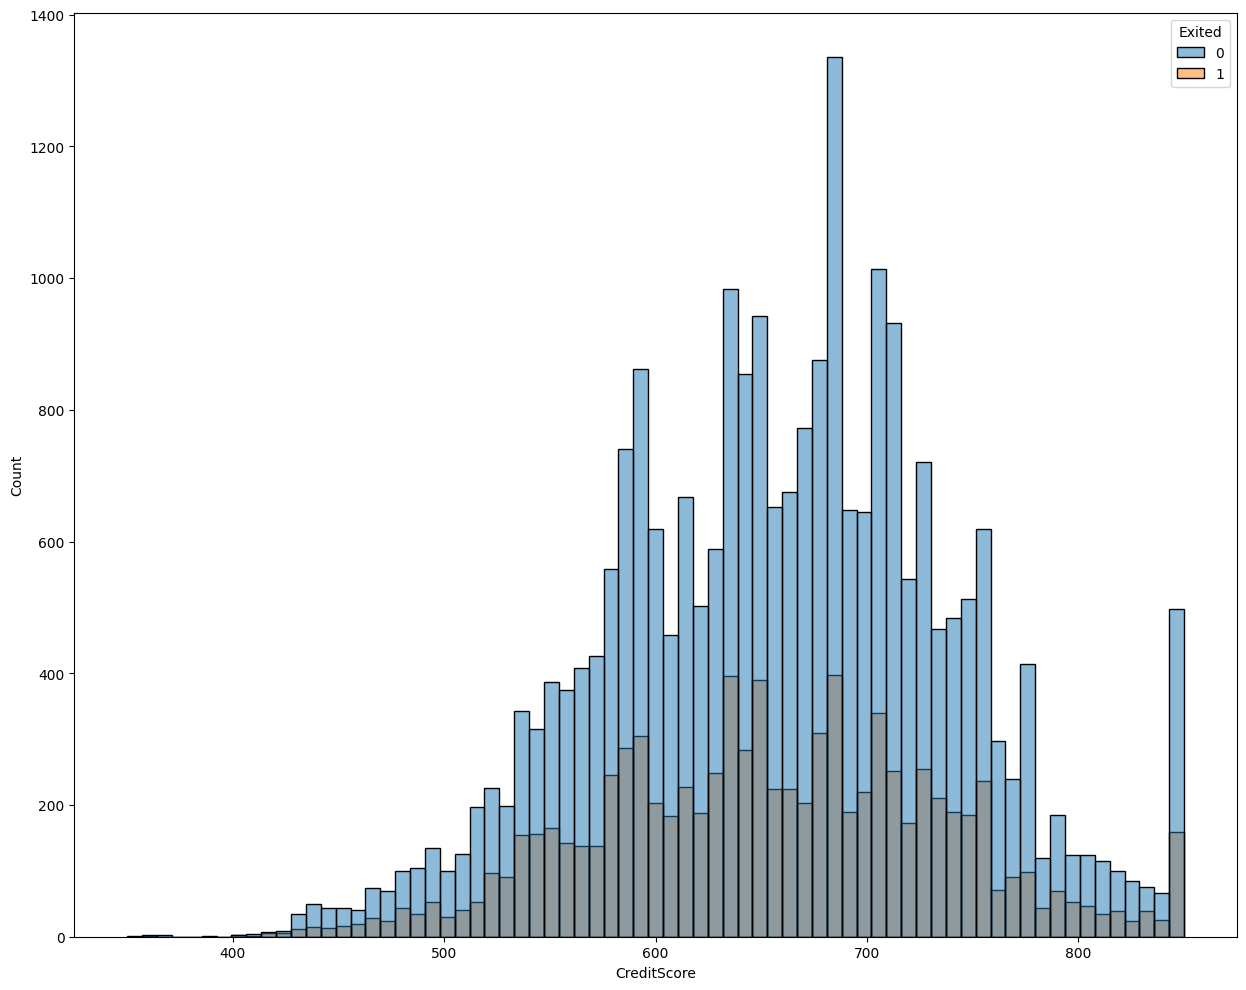

In [78]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_1['CreditScore'], hue = df_1['Exited'], palette = sns.color_palette())
plt.show();

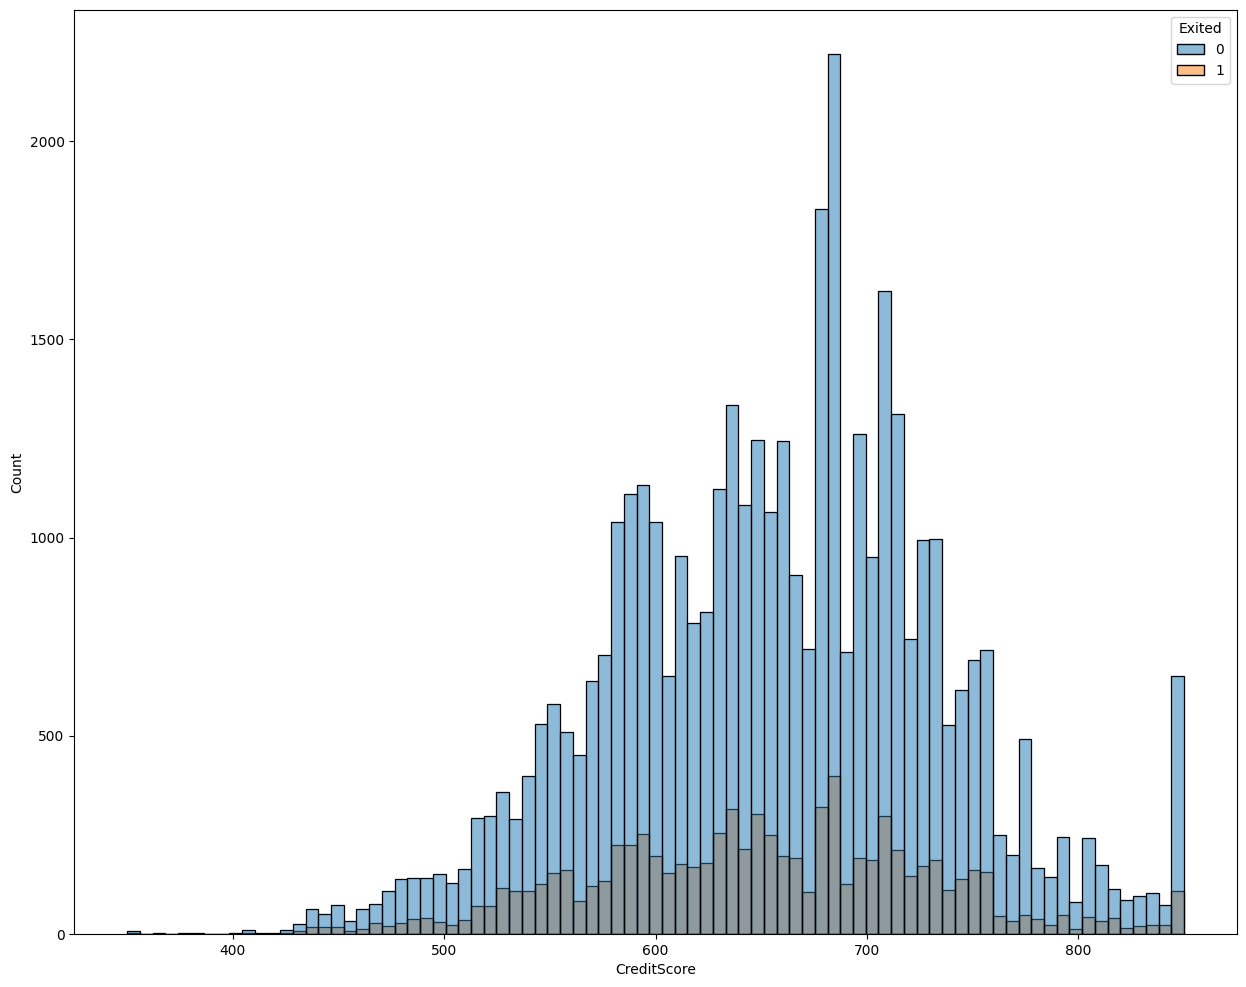

In [79]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_0['CreditScore'], hue = df_0['Exited'], palette = sns.color_palette())
plt.show();

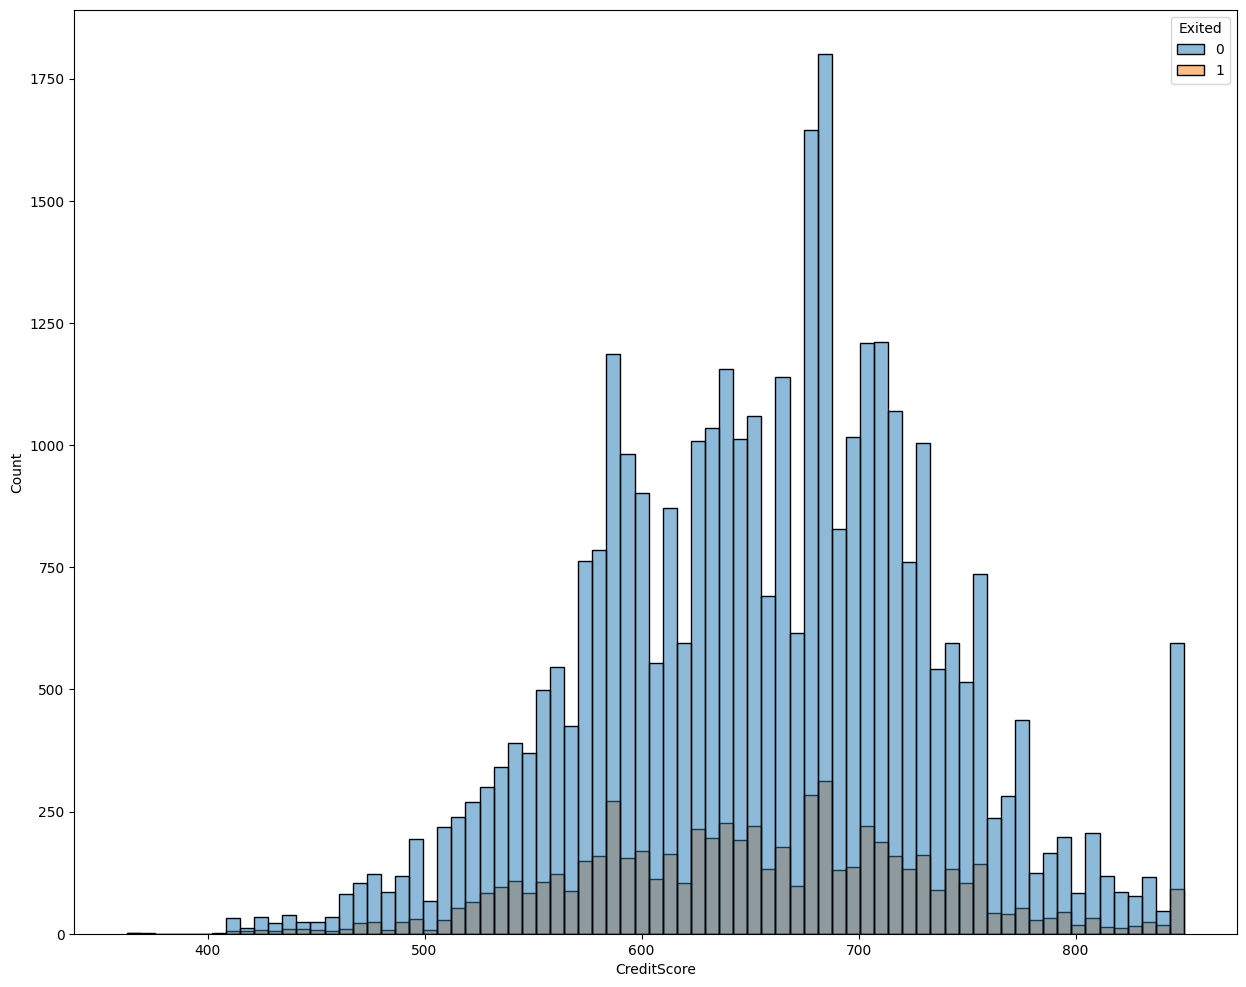

In [80]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_3['CreditScore'], hue = df_3['Exited'], palette = sns.color_palette())
plt.show();

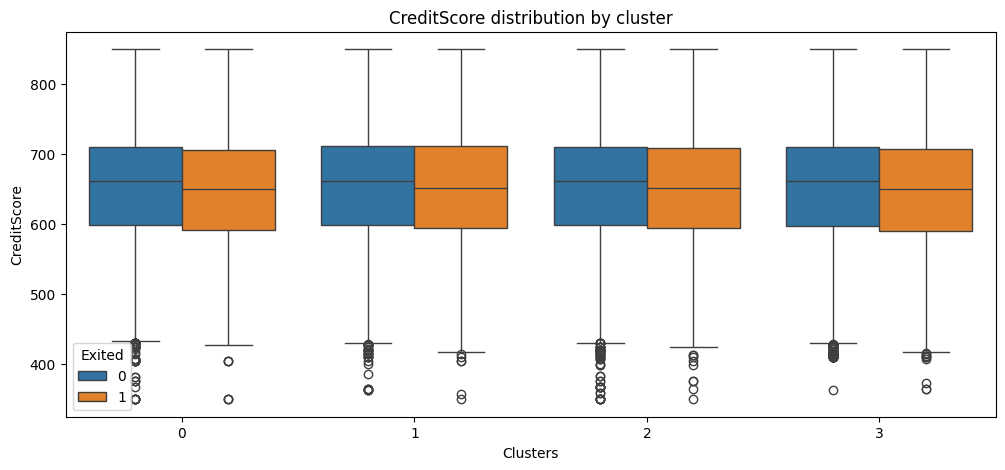

In [36]:
plt.figure(figsize=(12,5))

sns.boxplot(x='Clusters', y='CreditScore', hue='Exited',\
            data=df_drop_id_duplicated, )

plt.xlabel("Clusters")
plt.title("CreditScore distribution by cluster")
plt.show()

- 군집 간 나이 분포 및 평균 확인

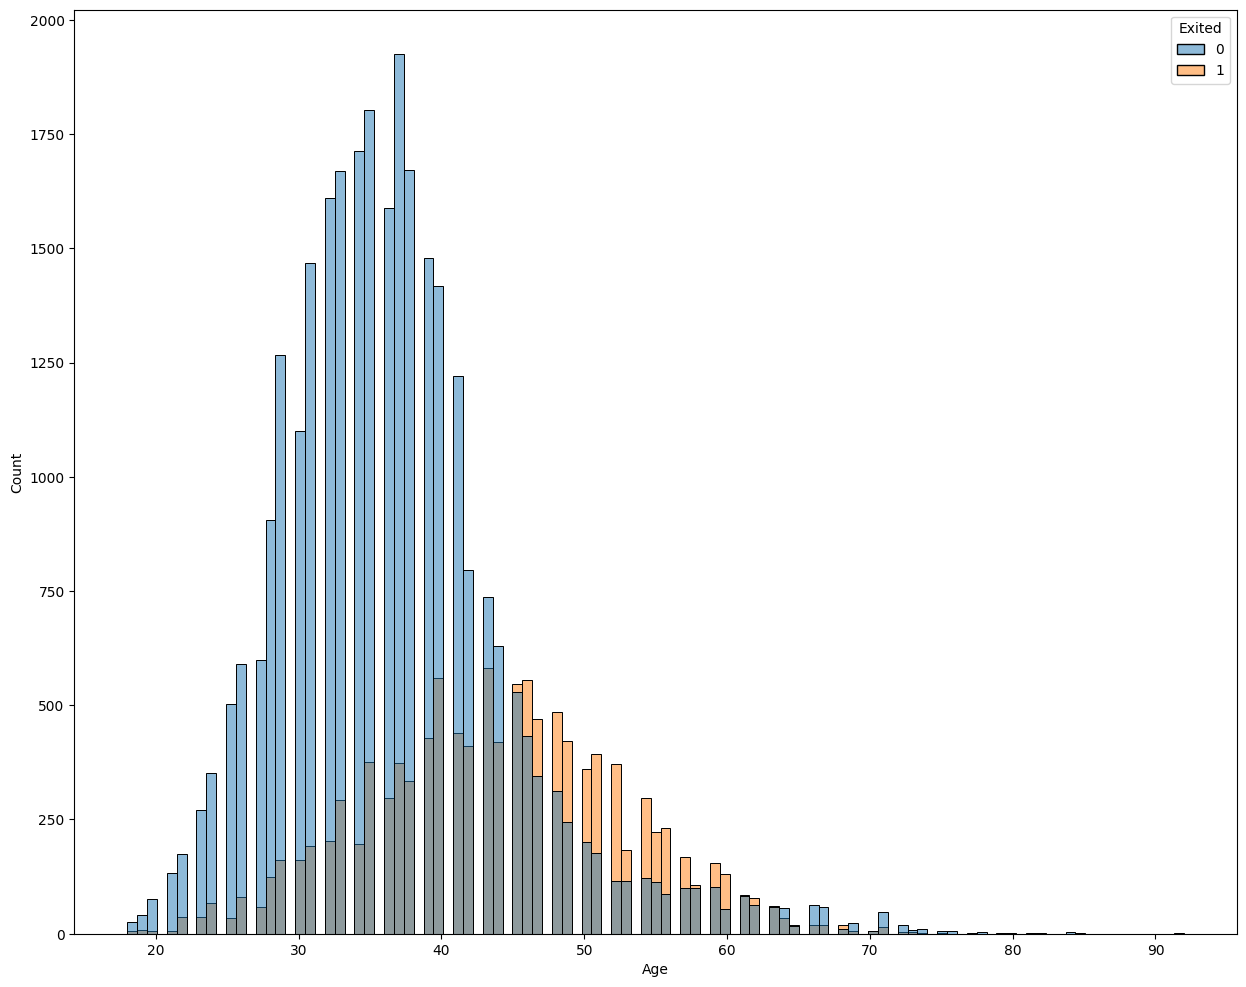

In [81]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_2['Age'], hue = df_2['Exited'], palette = sns.color_palette())
plt.show();

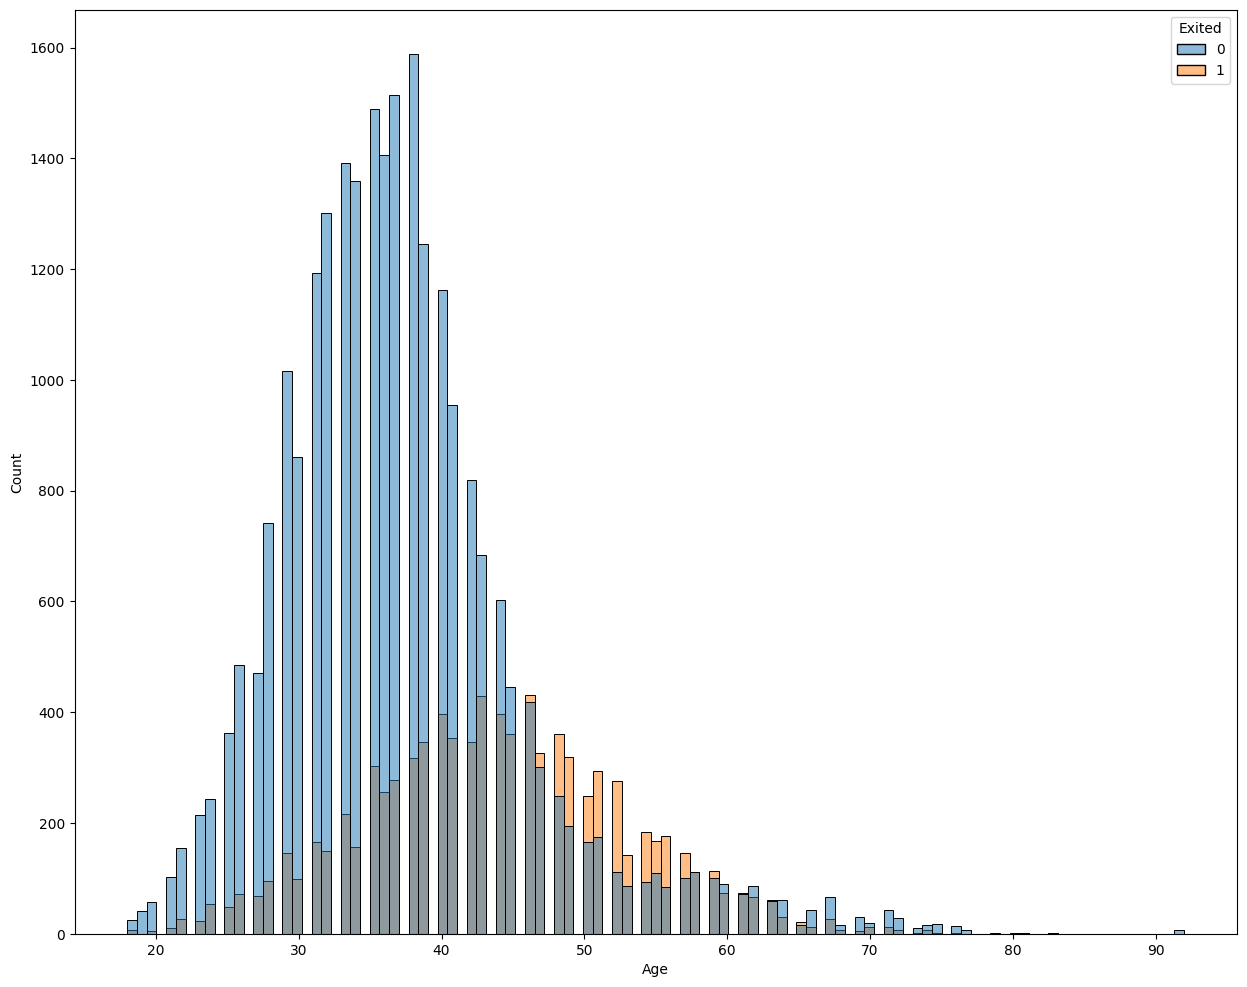

In [82]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_1['Age'], hue = df_1['Exited'], palette = sns.color_palette())
plt.show();

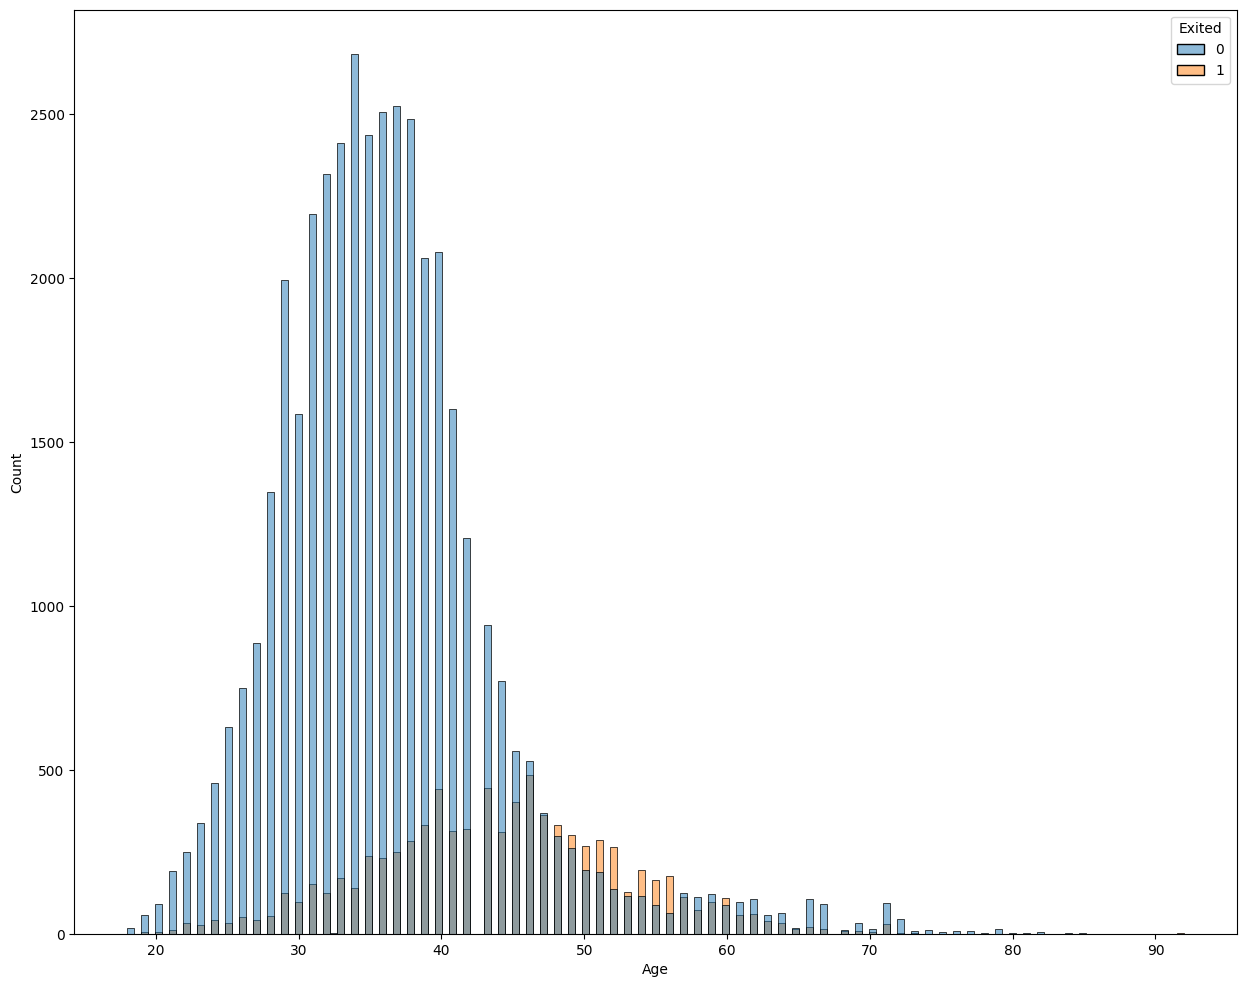

In [83]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_0['Age'], hue = df_0['Exited'], palette = sns.color_palette())
plt.show();

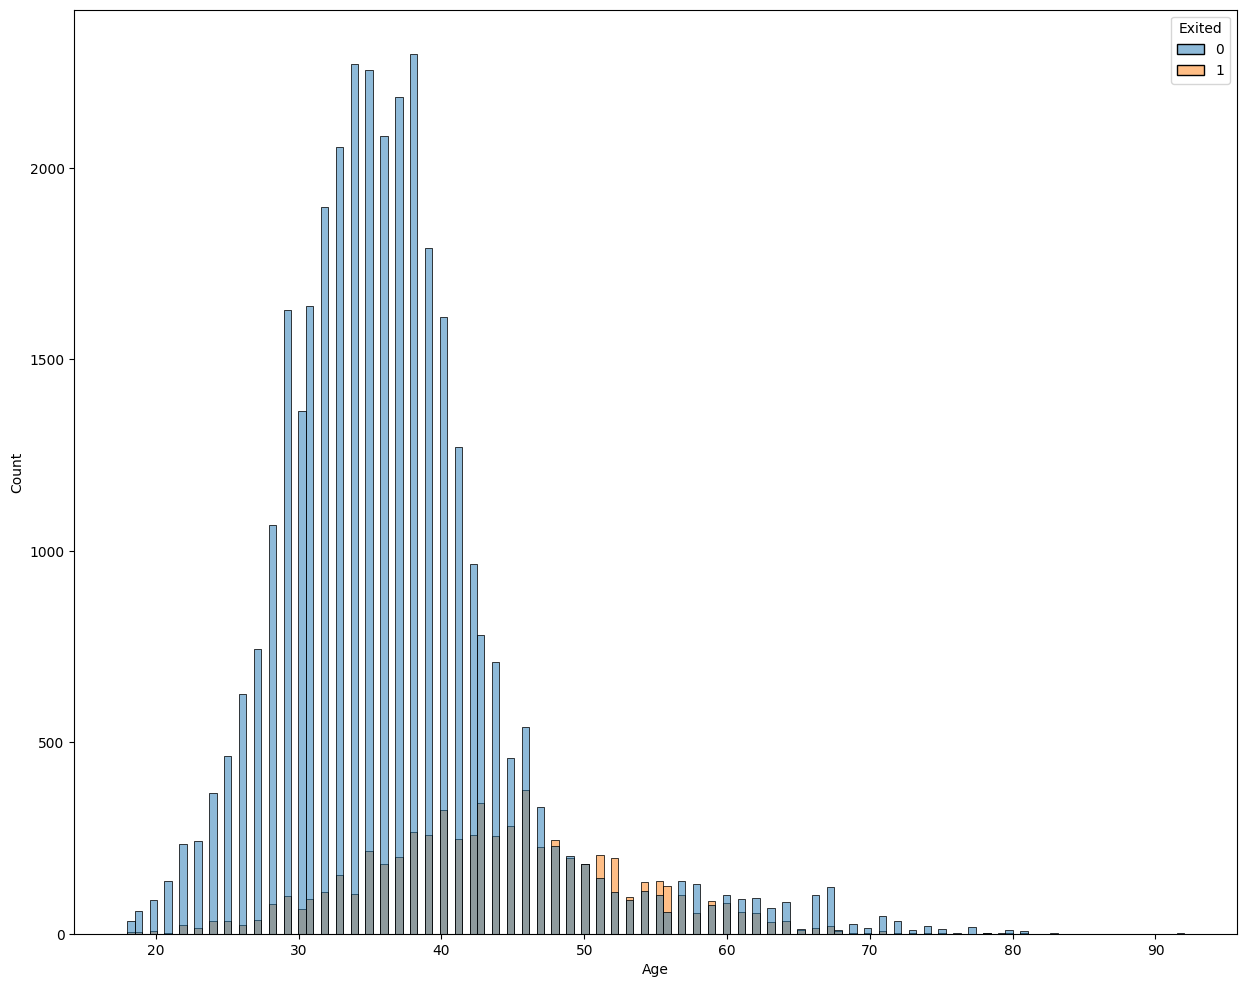

In [84]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_3['Age'], hue = df_3['Exited'], palette = sns.color_palette())
plt.show();

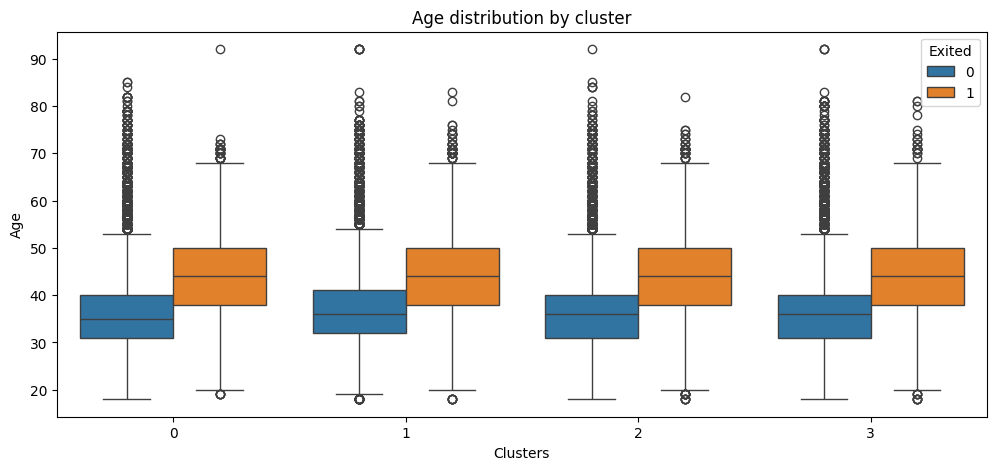

In [38]:
plt.figure(figsize=(12,5))

sns.boxplot(x='Clusters', y='Age', hue='Exited',\
            data=df_drop_id_duplicated, )

plt.xlabel("Clusters")
plt.title("Age distribution by cluster")
plt.show()

- --> 모든 군집 내에서 이탈 고객의 나이대가 비이탈 고객 나이대보다 더 높음

- 군집 간 잔고 분포 및 평균 확인

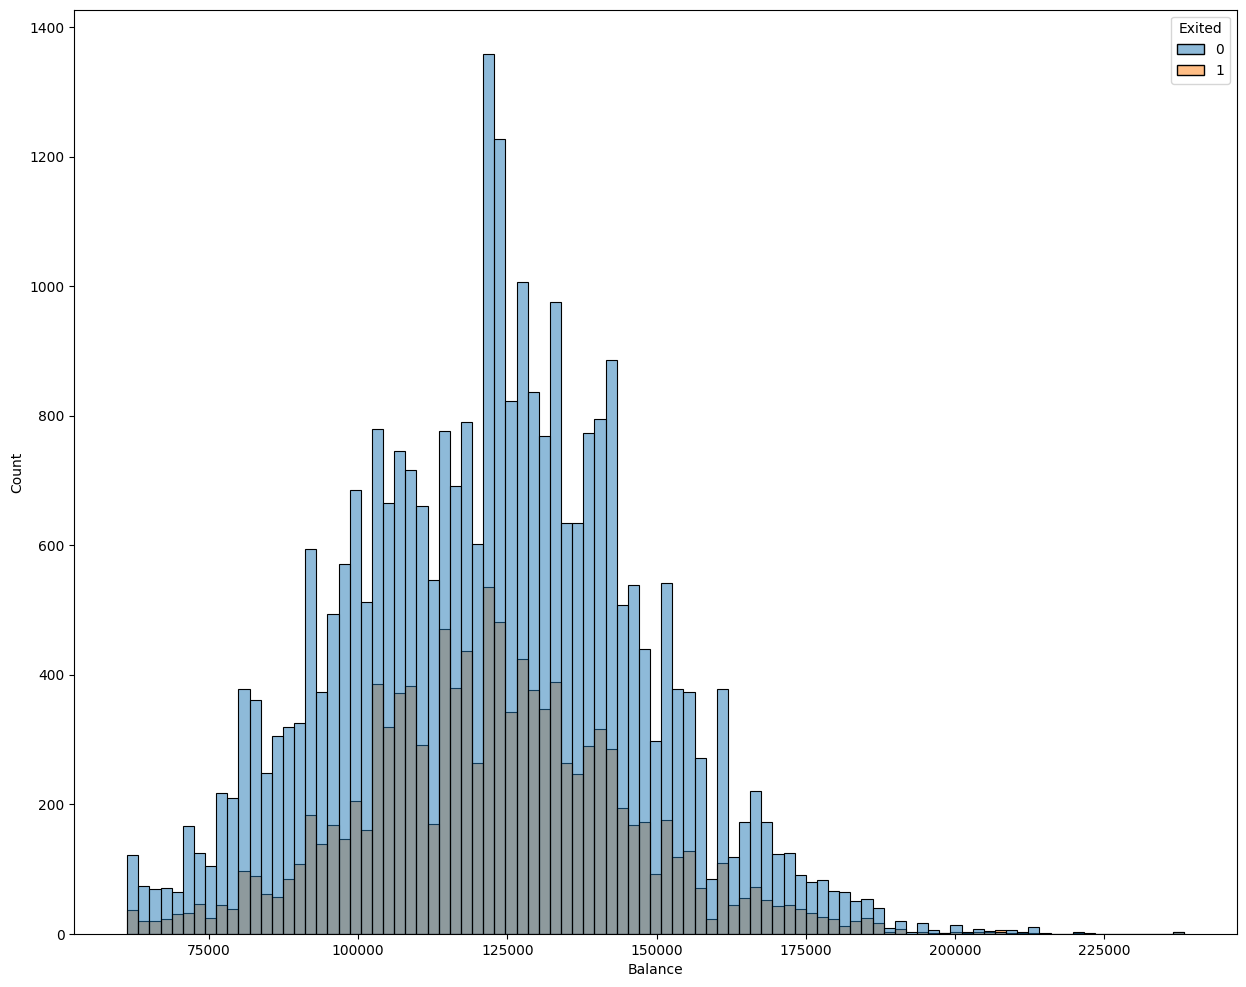

In [85]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_2['Balance'], hue = df_2['Exited'], palette = sns.color_palette())
plt.show();

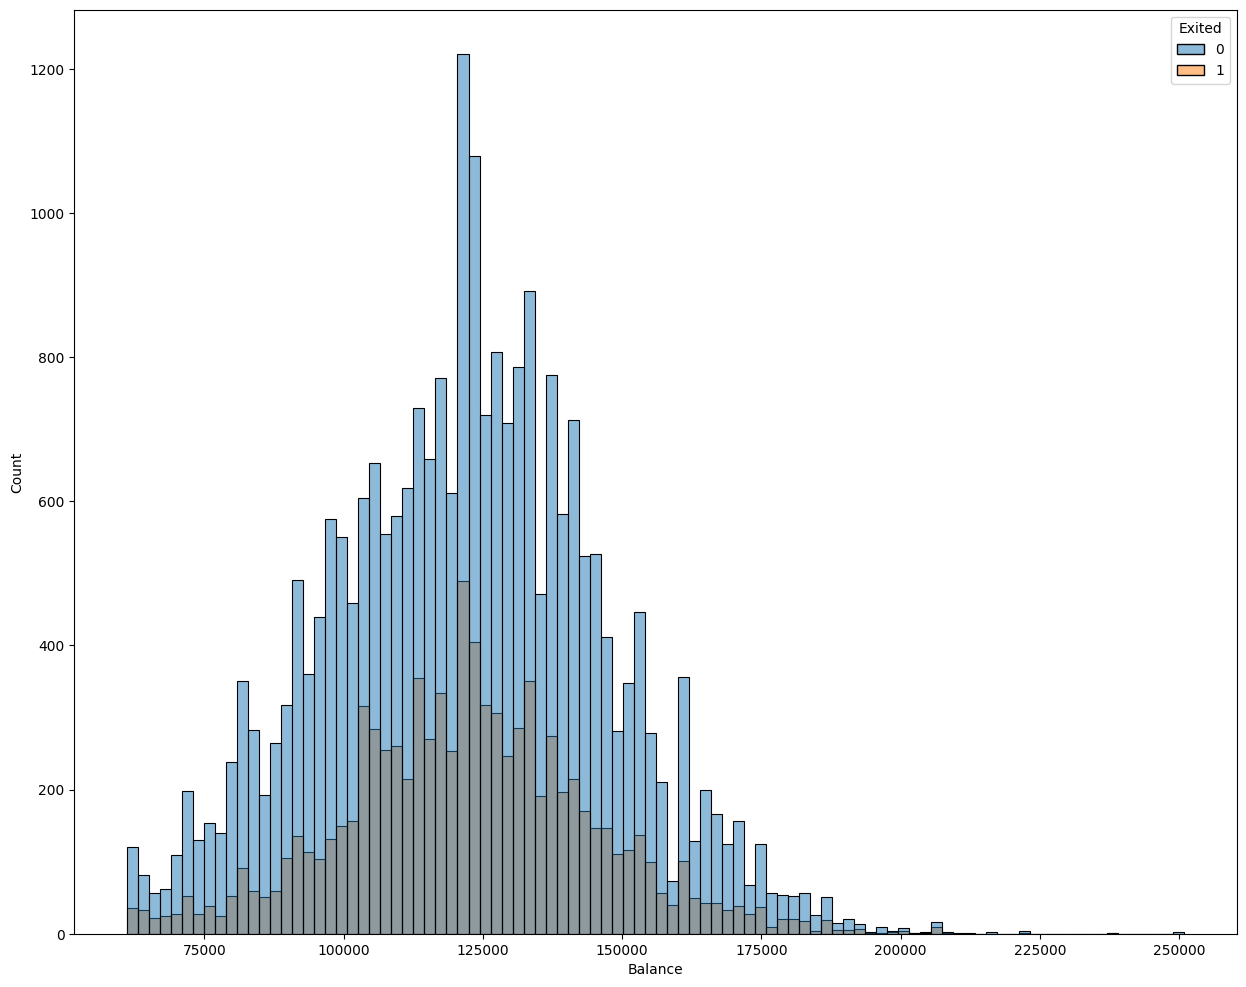

In [86]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_1['Balance'], hue = df_1['Exited'], palette = sns.color_palette())
plt.show();

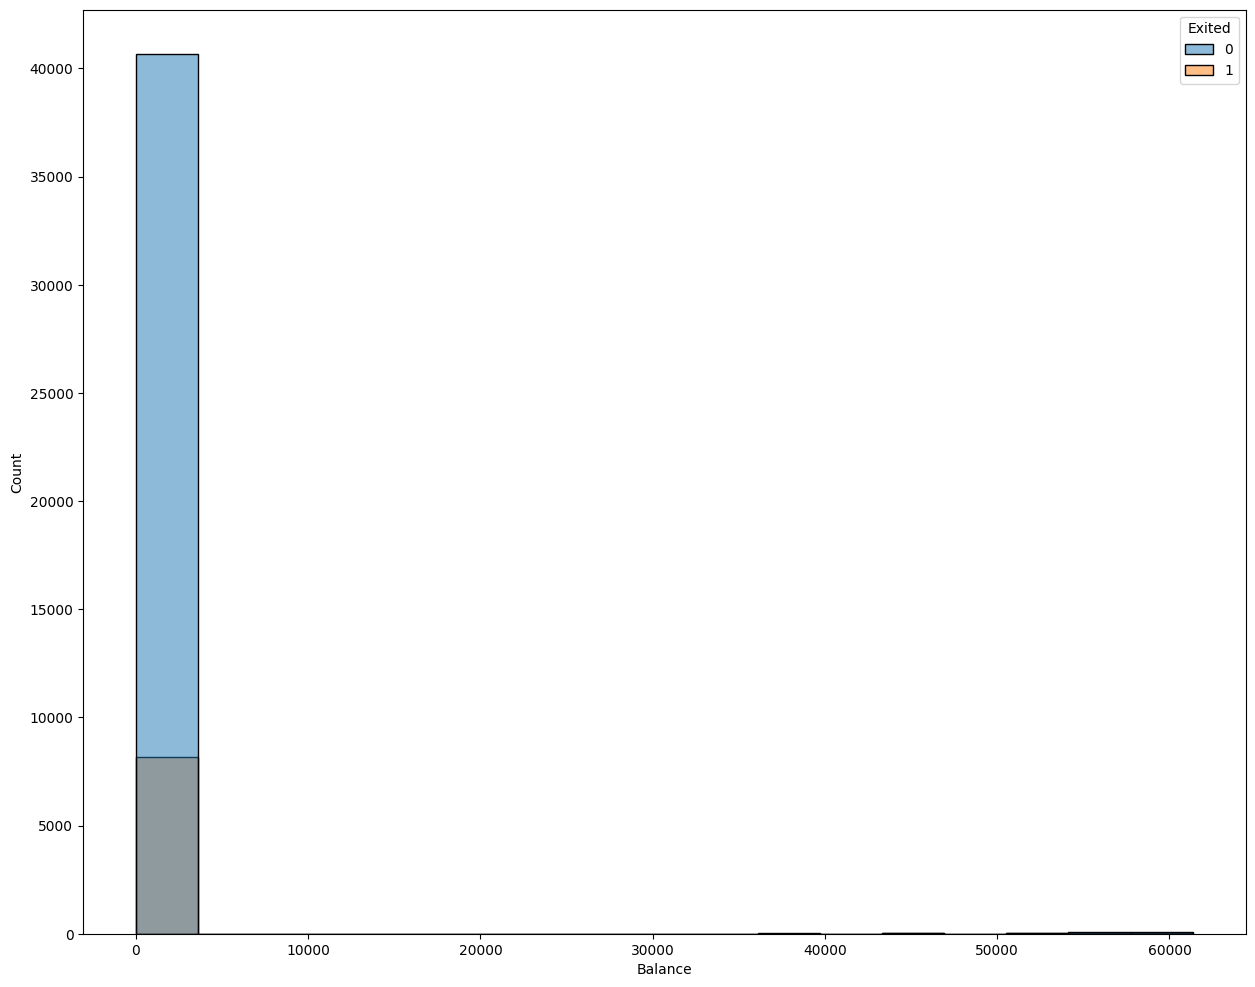

In [88]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_0['Balance'], hue = df_0['Exited'], palette = sns.color_palette())
plt.show();

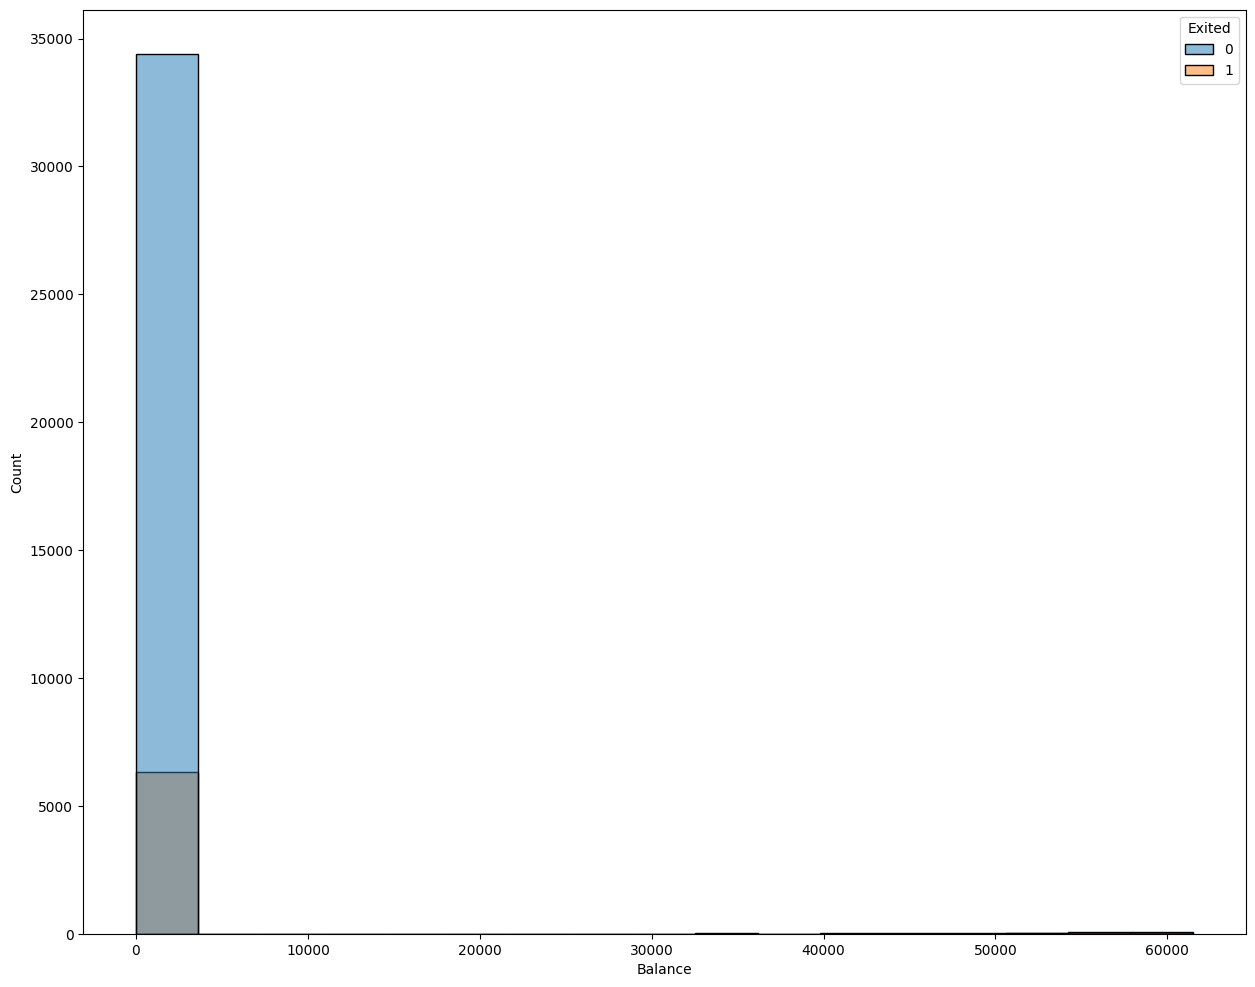

In [73]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_3['Balance'], hue = df_3['Exited'], palette = sns.color_palette())
plt.show();

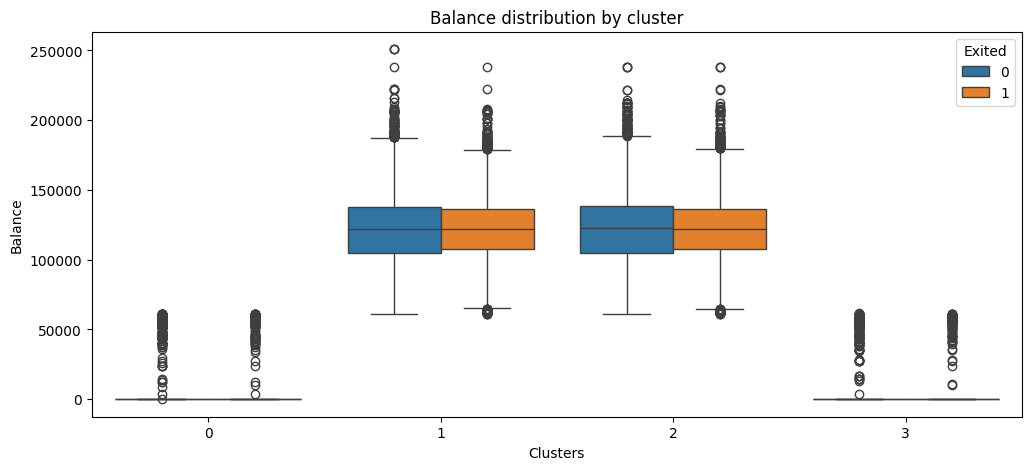

In [40]:
plt.figure(figsize=(12,5))

sns.boxplot(x='Clusters', y='Balance', hue='Exited',\
            data=df_drop_id_duplicated, )

plt.xlabel("Clusters")
plt.title("Balance distribution by cluster")
plt.show()

- 군집 간 예상급여 분포 및 평균 확인

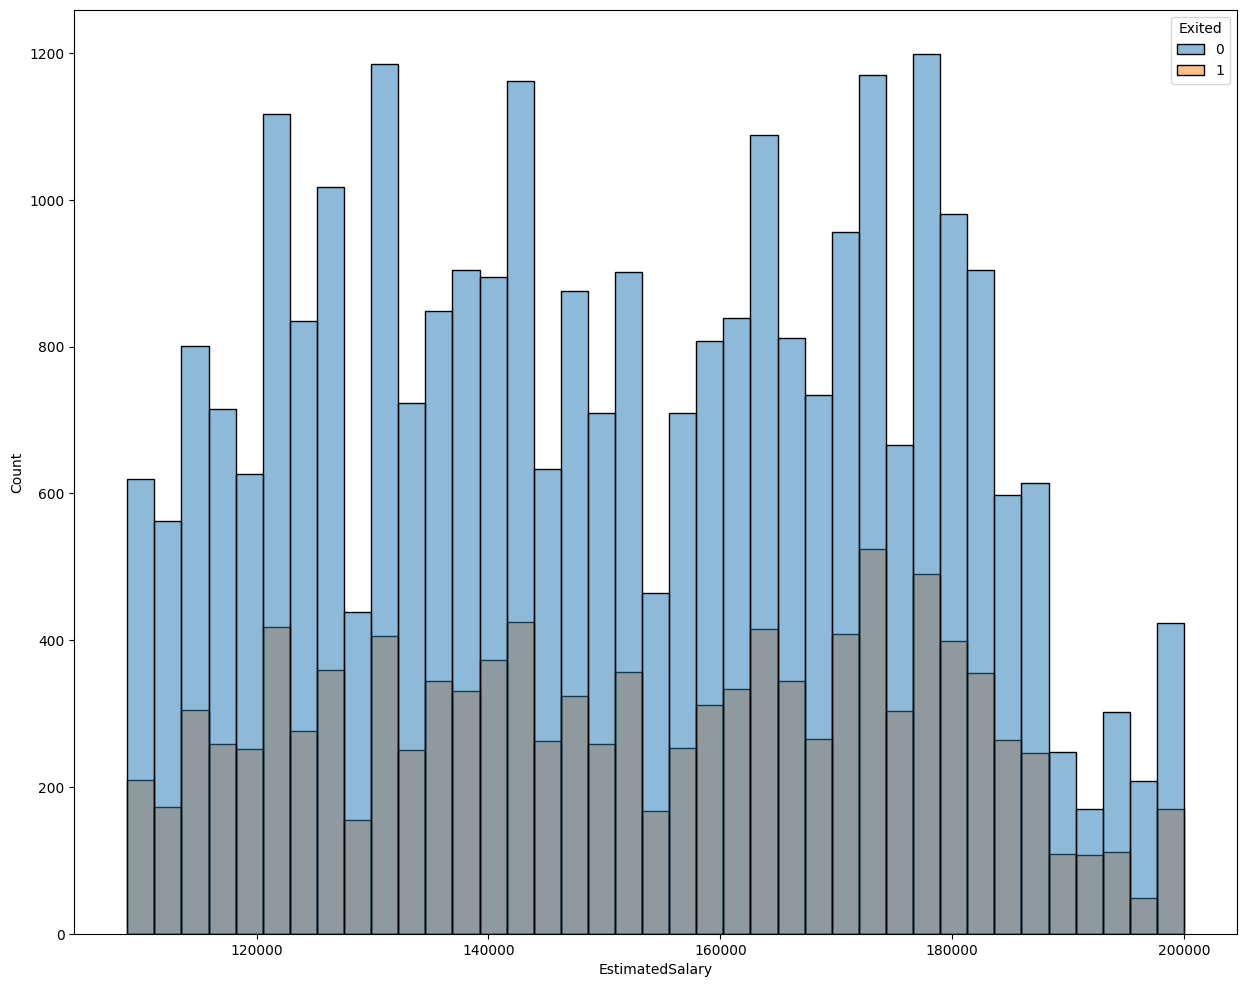

In [72]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_2['EstimatedSalary'], hue = df_2['Exited'], palette = sns.color_palette())
plt.show();

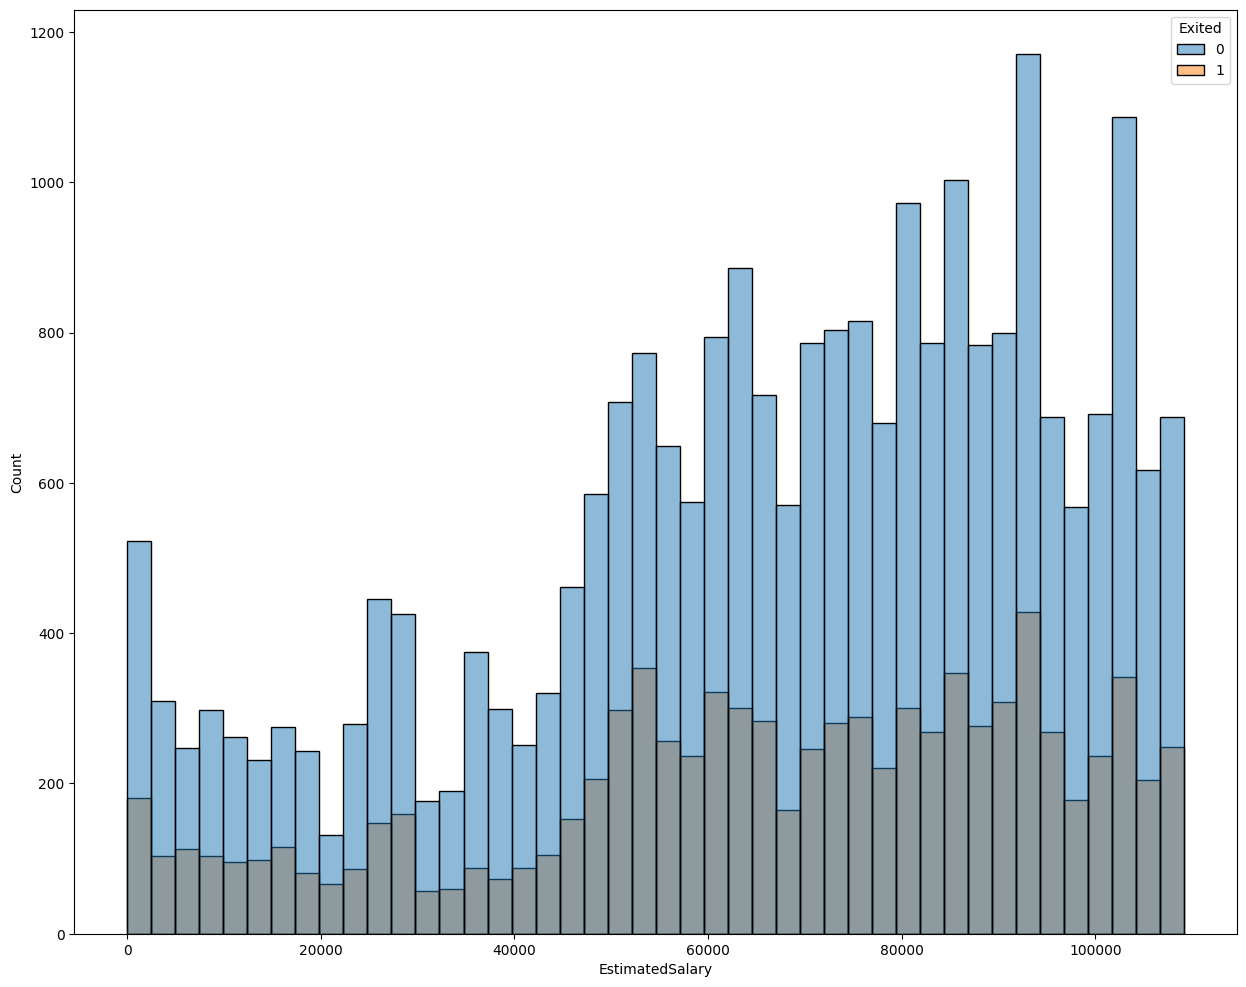

In [74]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_1['EstimatedSalary'], hue = df_1['Exited'], palette = sns.color_palette())
plt.show();

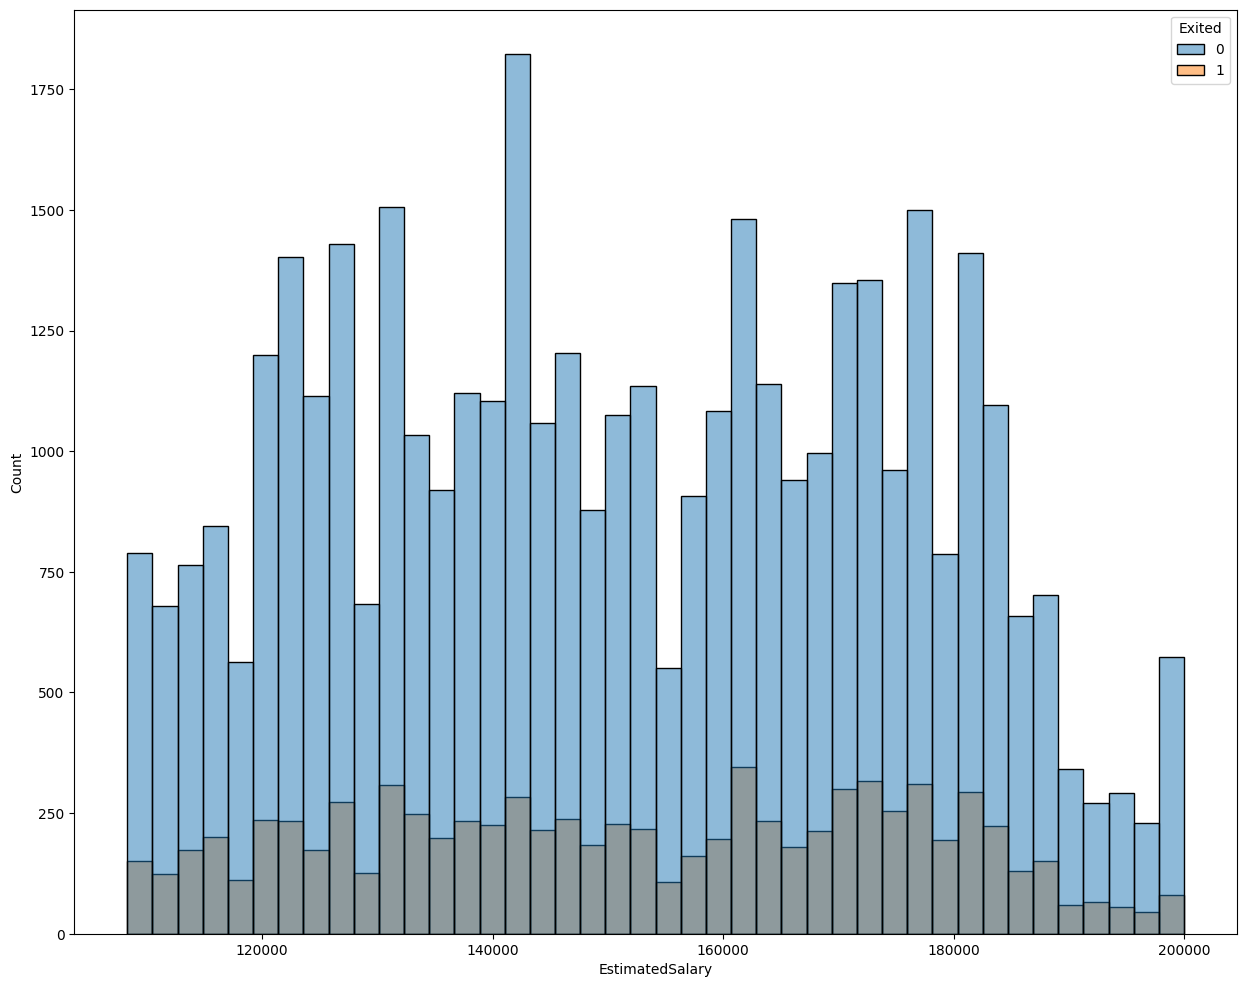

In [75]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_0['EstimatedSalary'], hue = df_0['Exited'], palette = sns.color_palette())
plt.show();

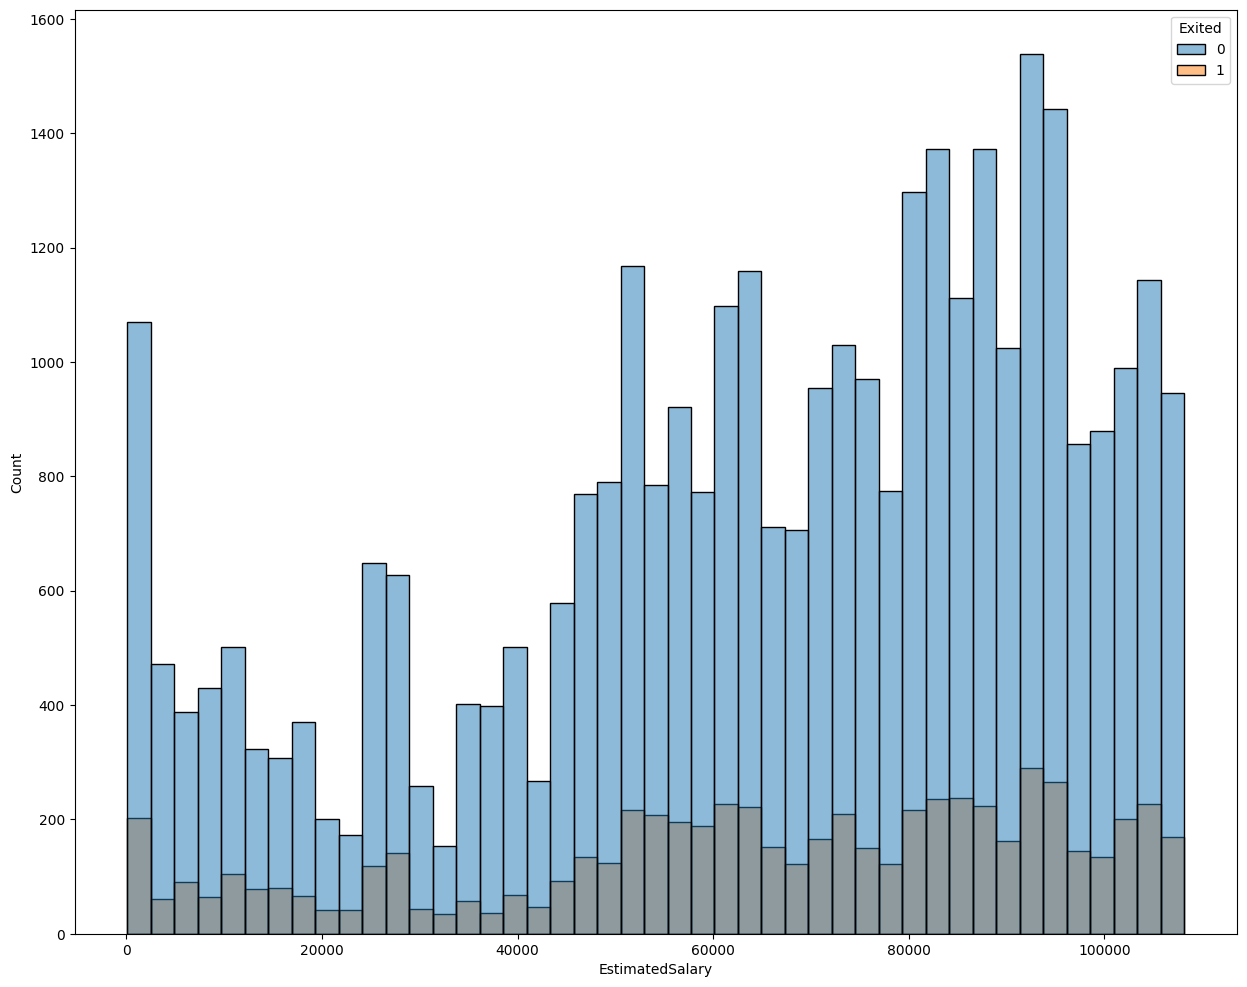

In [76]:
plt.figure(figsize=(15,12))
sns.histplot(x = df_3['EstimatedSalary'], hue = df_3['Exited'], palette = sns.color_palette())
plt.show();

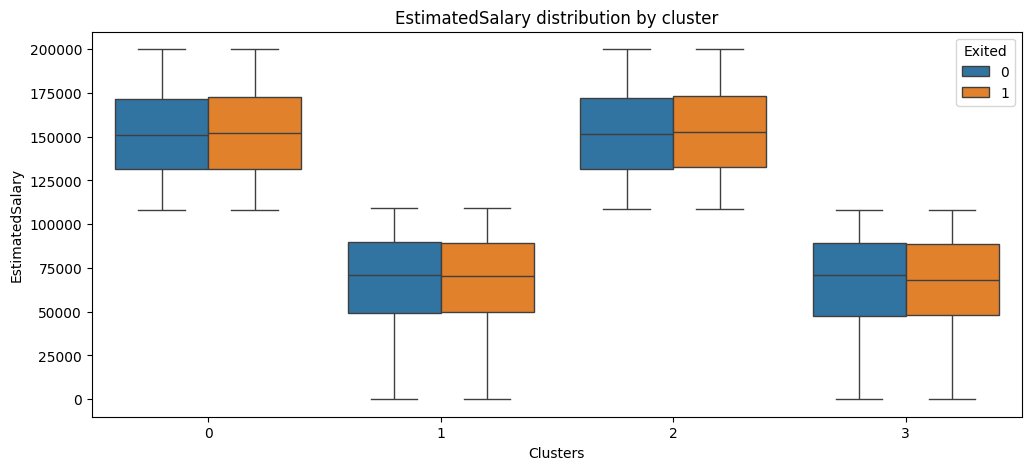

In [42]:
plt.figure(figsize=(12,5))

sns.boxplot(x='Clusters', y='EstimatedSalary', hue='Exited',\
            data=df_drop_id_duplicated, )

plt.xlabel("Clusters")
plt.title("EstimatedSalary distribution by cluster")
plt.show()

- 군집 간 성별 확인

In [44]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['Gender'])

Gender,Female,Male
Clusters,,
0,21233,28020
1,14794,18979
2,18340,22488
3,17469,23588


In [98]:
pd.crosstab(df_2['Exited'], df_2['Gender'], normalize=True, margins=True, margins_name='Total')

Gender,Female,Male,Total
Exited,,,
0,0.289287,0.432326,0.721613
1,0.159915,0.118473,0.278387
Total,0.449202,0.550798,1.000000


In [99]:
pd.crosstab(df_3['Exited'], df_3['Gender'], normalize=True, margins=True, margins_name='Total')

Gender,Female,Male,Total
Exited,,,
0,0.334973,0.508975,0.843949
1,0.090508,0.065543,0.156051
Total,0.425482,0.574518,1.000000


- 군집 간 지역 확인

In [46]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['Geography'])

Geography,France,Germany,Spain
Clusters,,,
0,35808,166,13279
1,13034,15287,5452
2,15575,18988,6265
3,29715,146,11196


In [100]:
pd.crosstab(df_2['Exited'], df_2['Geography'], normalize=True, margins=True, margins_name='Total')

Geography,France,Germany,Spain,Total
Exited,,,,
0,0.312947,0.284462,0.124204,0.721613
1,0.068531,0.180611,0.029245,0.278387
Total,0.381478,0.465073,0.153449,1.000000


In [101]:
pd.crosstab(df_3['Exited'], df_3['Geography'], normalize=True, margins=True, margins_name='Total')

Geography,France,Germany,Spain,Total
Exited,,,,
0,0.612027,0.002533,0.229388,0.843949
1,0.111723,0.001023,0.043306,0.156051
Total,0.723750,0.003556,0.272694,1.000000


- 군집 간 계약 기간 확인

In [48]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['Tenure'])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Clusters,,,,,,,,,,,
0,1389,4666,5514,4956,5328,5118,4748,5591,5357,4883,1703
1,1124,3541,3628,3545,3479,3580,3226,3445,3536,3403,1266
2,1377,4415,4229,4112,4317,4253,3890,4244,4281,4157,1553
3,1116,4123,4654,4005,4420,4299,3947,4514,4339,4258,1382


In [49]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['Tenure'], normalize=True, margins=True, margins_name='Total')

Tenure,0,1,2,3,4,5,6,7,8,9,10,Total
Clusters,,,,,,,,,,,,
0,0.008423,0.028294,0.033436,0.030053,0.032308,0.031035,0.028791,0.033903,0.032484,0.029610,0.010327,0.298664
1,0.006816,0.021472,0.022000,0.021496,0.021096,0.021709,0.019562,0.020890,0.021442,0.020635,0.007677,0.204795
2,0.008350,0.026772,0.025644,0.024935,0.026178,0.025790,0.023588,0.025735,0.025959,0.025208,0.009417,0.247576
3,0.006767,0.025001,0.028221,0.024286,0.026802,0.026069,0.023934,0.027372,0.026311,0.025820,0.008380,0.248965
Total,0.030356,0.101540,0.109301,0.100770,0.106385,0.104602,0.095876,0.107901,0.106197,0.101273,0.035801,1.000000


In [102]:
pd.crosstab(df_2['Exited'], df_2['Tenure'], normalize=True, margins=True, margins_name='Total')

Tenure,0,1,2,3,4,5,6,7,8,9,10,Total
Exited,,,,,,,,,,,,
0,0.023048,0.076149,0.075830,0.071642,0.075047,0.073822,0.069756,0.077300,0.077643,0.073038,0.028338,0.721613
1,0.010679,0.031988,0.027751,0.029073,0.030690,0.030347,0.025522,0.026648,0.027212,0.028779,0.009699,0.278387
Total,0.033727,0.108137,0.103581,0.100715,0.105736,0.104169,0.095278,0.103948,0.104855,0.101817,0.038038,1.000000


In [103]:
pd.crosstab(df_3['Exited'], df_3['Tenure'], normalize=True, margins=True, margins_name='Total')

Tenure,0,1,2,3,4,5,6,7,8,9,10,Total
Exited,,,,,,,,,,,,
0,0.021702,0.083810,0.097182,0.079840,0.088876,0.087829,0.083153,0.094430,0.090533,0.087975,0.028619,0.843949
1,0.005480,0.016611,0.016173,0.017707,0.018779,0.016879,0.012982,0.015515,0.015150,0.015734,0.005042,0.156051
Total,0.027182,0.100421,0.113355,0.097547,0.107655,0.104708,0.096135,0.109945,0.105682,0.103709,0.033661,1.000000


- 군집 간 상품수 확인

In [50]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['NumOfProducts'])

NumOfProducts,1,2,3,4
Clusters,,,,
0,13911,34537,720,85
1,23424,9534,676,139
2,28606,11205,837,180
3,11382,28945,659,71


In [51]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['NumOfProducts'], normalize=True, margins=True, margins_name='Total')

NumOfProducts,1,2,3,4,Total
Clusters,,,,,
0,0.084355,0.209428,0.004366,0.000515,0.298664
1,0.142040,0.057813,0.004099,0.000843,0.204795
2,0.173463,0.067946,0.005075,0.001091,0.247576
3,0.069019,0.175519,0.003996,0.000431,0.248965
Total,0.468877,0.510706,0.017537,0.002880,1.000000


In [104]:
pd.crosstab(df_2['Exited'], df_2['NumOfProducts'], normalize=True, margins=True, margins_name='Total')

NumOfProducts,1,2,3,4,Total
Exited,,,,,
0,0.482463,0.237362,0.001347,0.000441,0.721613
1,0.218184,0.037082,0.019154,0.003968,0.278387
Total,0.700647,0.274444,0.020501,0.004409,1.000000


In [105]:
pd.crosstab(df_3['Exited'], df_3['NumOfProducts'], normalize=True, margins=True, margins_name='Total')

NumOfProducts,1,2,3,4,Total
Exited,,,,,
0,0.160776,0.679981,0.002825,0.000365,0.843949
1,0.116448,0.025014,0.013226,0.001364,0.156051
Total,0.277224,0.704995,0.016051,0.001729,1.000000


- --> 이탈률이 가장 높은 군집과 낮은 군집 모두 3, 4일 때 이탈한 고객이 이탈하지 않은 고객보다 많음

- 군집 간 신용카드 유무 확인

In [52]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['HasCrCard'])

HasCrCard,0.0,1.0
Clusters,,
0,11631,37622
1,8661,25112
2,10458,30370
3,9832,31225


In [53]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['HasCrCard'], normalize=True, margins=True, margins_name='Total')

HasCrCard,0.0,1.0,Total
Clusters,,,
0,0.070529,0.228135,0.298664
1,0.052519,0.152276,0.204795
2,0.063416,0.184160,0.247576
3,0.059620,0.189345,0.248965
Total,0.246084,0.753916,1.000000


In [106]:
pd.crosstab(df_2['Exited'], df_2['HasCrCard'], normalize=True, margins=True, margins_name='Total')

HasCrCard,0.0,1.0,Total
Exited,,,
0,0.181934,0.539679,0.721613
1,0.074214,0.204174,0.278387
Total,0.256148,0.743852,1.000000


In [107]:
pd.crosstab(df_3['Exited'], df_3['HasCrCard'], normalize=True, margins=True, margins_name='Total')

HasCrCard,0.0,1.0,Total
Exited,,,
0,0.199625,0.644324,0.843949
1,0.039847,0.116204,0.156051
Total,0.239472,0.760528,1.000000


- 군집 간 활성멤버 확인

In [54]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['IsActiveMember'])

IsActiveMember,0.0,1.0
Clusters,,
0,24427,24826
1,17018,16755
2,21087,19741
3,20304,20753


In [55]:
pd.crosstab(df_drop_id_duplicated['Clusters'], df_drop_id_duplicated['IsActiveMember'], normalize=True, margins=True, margins_name='Total')

IsActiveMember,0.0,1.0,Total
Clusters,,,
0,0.148122,0.150542,0.298664
1,0.103195,0.101600,0.204795
2,0.127869,0.119707,0.247576
3,0.123121,0.125844,0.248965
Total,0.502307,0.497693,1.000000


In [108]:
pd.crosstab(df_2['Exited'], df_2['IsActiveMember'], normalize=True, margins=True, margins_name='Total')

IsActiveMember,0.0,1.0,Total
Exited,,,
0,0.320099,0.401514,0.721613
1,0.196385,0.082003,0.278387
Total,0.516484,0.483516,1.000000


In [109]:
pd.crosstab(df_3['Exited'], df_3['IsActiveMember'], normalize=True, margins=True, margins_name='Total')

IsActiveMember,0.0,1.0,Total
Exited,,,
0,0.383102,0.460847,0.843949
1,0.111430,0.044621,0.156051
Total,0.494532,0.505468,1.000000


- 군집 간 변수 기초 통계 확인

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_drop_id_duplicated.groupby(['Clusters','Exited']).describe().T

Clusters                           0                             1  \
Exited                             0              1              0   
CreditScore     count   40954.000000    8299.000000   24936.000000   
                mean      656.863969     649.426919     658.521936   
                std        78.324063      80.256925      81.826921   
                min       350.000000     350.000000     363.000000   
                25%       599.000000     592.000000     599.000000   
                50%       662.000000     650.000000     662.000000   
                75%       710.000000     706.000000     712.000000   
                max       850.000000     850.000000     850.000000   
Age             count   40954.000000    8299.000000   24936.000000   
                mean       36.231829      44.136040      37.145051   
                std         7.903253       8.886482       8.564237   
                min        18.000000      19.000000      18.000000   
                25%        31.000000      38.000000      32.000000   
                50%        35.000000      44.000000      36.000000   
                75%        40.000000      50.000000      41.000000   
                max        85.000000      92.000000      92.000000   
Tenure          count   40954.000000    8299.000000   24936.000000   
                mean        5.071519       4.967225       5.006336   
                std         2.771838       2.805735       2.822828   
                min         0.000000       0.000000       0.000000   
                25%         3.000000       3.000000       3.000000   
                50%         5.000000       5.000000       5.000000   
                75%         7.000000       7.000000       7.000000   
                max        10.000000      10.000000      10.000000   
Balance         count   40954.000000    8299.000000   24936.000000   
                mean      349.496908     710.213021  121821.832081   
                std      4348.227446    6143.576636   24756.623033   
                min         0.000000       0.000000   61172.040000   
                25%         0.000000       0.000000  104787.507500   
                50%         0.000000       0.000000  122277.870000   
                75%         0.000000       0.000000  137964.435000   
                max     61354.140000   61319.630000  250898.090000   
NumOfProducts   count   40954.000000    8299.000000   24936.000000   
                mean        1.816624       1.335944       1.340552   
                std         0.395097       0.653281       0.483621   
                min         1.000000       1.000000       1.000000   
                25%         2.000000       1.000000       1.000000   
                50%         2.000000       1.000000       1.000000   
                75%         2.000000       1.000000       2.000000   
                max         4.000000       4.000000       4.000000   
HasCrCard       count   40954.000000    8299.000000   24936.000000   
                mean        0.768765       0.739607       0.749158   
                std         0.421627       0.438875       0.433507   
                min         0.000000       0.000000       0.000000   
                25%         1.000000       0.000000       0.000000   
                50%         1.000000       1.000000       1.000000   
                75%         1.000000       1.000000       1.000000   
                max         1.000000       1.000000       1.000000   
IsActiveMember  count   40954.000000    8299.000000   24936.000000   
                mean        0.546564       0.294252       0.564846   
                std         0.497833       0.455733       0.495787   
                min         0.000000       0.000000       0.000000   
                25%         0.000000       0.000000       0.000000   
                50%         1.000000       0.000000       1.000000   
                75%         1.000000       1.000000       1.000000   
          

- 정리
  - kmeans, kprototype 모두 나이대, 상품수에 따른 이탈 고객의 특성들을 발견할 수 있었음
  - 하지만, 위 특성들은 전부 군집화를 진행하지 않아도 eda를 통해서 발견할 수 있었으므로 군집화가 꼭 필요한지 의문이 들음
